In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [4]:
#Q1


movies=pd.read_csv('my_movies.csv')

In [5]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
movies.shape

(10, 15)

In [7]:
df=pd.get_dummies(movies)

In [8]:
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [29]:
# applying Apriori algorithm

frequent_timeset=apriori(df,min_support=0.6,use_colnames=True)
frequent_timeset

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(V2_Patriot, Gladiator)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(V2_Patriot, Patriot)"


In [30]:
X=frequent_timeset.sort_values('support', ascending= False)[0:20]

In [31]:
X

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(V2_Patriot, Gladiator)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(V2_Patriot, Patriot)"


In [32]:
# finding rules 

rules=association_rules(frequent_timeset, metric="lift", min_threshold=1)
rules
# Currently implemented measures are confidence and lift. 
#Let's say you are interested in rules derived from the frequent itemsets only if the level of confidence is above the 100 percent threshold (min_threshold=1):

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


#Lift Ratio>1 useful in finding consequent itemset



#Lift Ratio <1 non-useful reject all rules


#Because lift ratio shows how effective the rule is in finding consequent vs random.



#confidence shows that th rate at which consequent will be found.



#leverage will be -1 to 1 if leverage=0 means their values are independent so we want leverage close to -1 to 1 for strong relationships.



#High value of conviction means consequent highly depends on the antecedent range 0-infinity.



# Best rule LIFT Ratio>1

<AxesSubplot:>

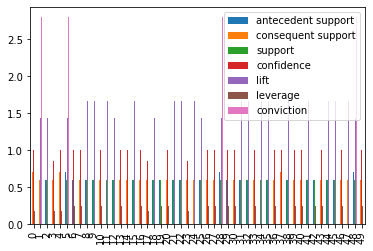

In [33]:
rules.plot(kind="bar")

In [78]:
rules1=association_rules(frequent_timeset,metric='confidence',min_threshold=1.2)

# here we are interested in rules according to a different metric of interest, 
#we can simply adjust the metric and min_threshold arguments .

In [79]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


<AxesSubplot:>

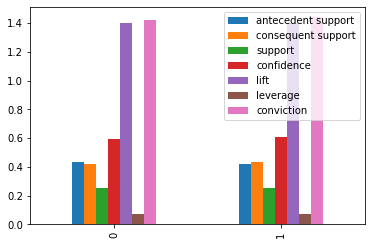

In [80]:
rules.plot(kind="bar")

In [36]:
rules.sort_values('lift', ascending= False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(V2_Patriot),"(V1_Gladiator, Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


<AxesSubplot:>

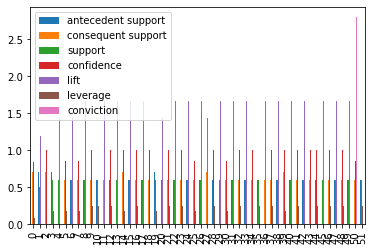

In [21]:
rules.plot(kind="bar")

In [26]:
#leverage is lie between -1 to +1 if leverage value=0 than there is independancy between the values.
#LIFT>1 means Best rule.

In [37]:
rules[rules.lift>1]
rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(V2_Patriot),"(V1_Gladiator, Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [38]:
data=rules.values

In [39]:
data=pd.DataFrame(data)

In [20]:
data

,0,1,2,3,4,5,6,7,8
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2, V3_Harry Po...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64248,(Sixth Sense),"(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2, V3_Harry Po...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V1_Sixth Sense),"(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2, V3_Harry Po...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64250,(V4_Green Mile),"(V2_LOTR1, V5_LOTR2, LOTR1, LOTR2, V3_Harry Po...",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [2]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

In [41]:
#Q2

book=pd.read_csv('book.csv')

In [42]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [62]:
#applying apriori algorithm

frequent_timeset=apriori(book, min_support=0.2, use_colnames=True)

In [63]:
frequent_timeset

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [64]:
#finding rules

rules=association_rules(frequent_timeset, metric="lift", min_threshold=0.6)

In [65]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


<AxesSubplot:>

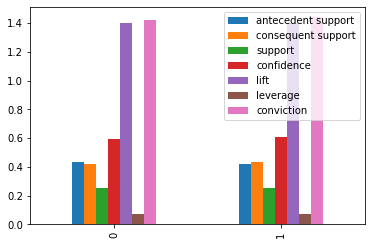

In [66]:
rules.plot(kind="bar")

In [69]:
rules1=association_rules(frequent_timeset, metric="confidence", min_threshold=0.5)

<AxesSubplot:>

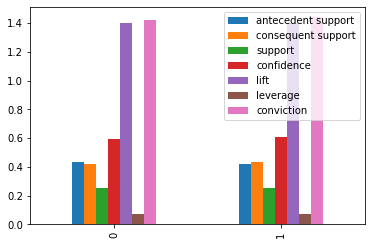

In [70]:
rules1.plot(kind="bar")

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [75]:
rules2=association_rules(frequent_timeset, metric='support',min_threshold=1.2)

In [76]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


<AxesSubplot:>

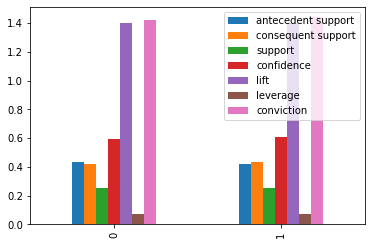

In [77]:
rules.plot(kind="bar")

In [37]:
#sorting

rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [38]:
rules[rules.lift>1][0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


#Lift Ratio>1 useful in finding consequent itemset 


#Lift Ratio <1 non-useful reject all rules #Because lift ratio shows how effective the rule is in finding consequent vs random. 

#confidence shows that th rate at which consequent will be found. 



#leverage will be -1 to 1 if leverage=0 means their values are independent so we want leverage close to -1 to 1 for strong relationships. 


#High value of conviction means consequent highly depends on the antecedent range 0-infinity.


Best rule LIFT Ratio>1